# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.056834e+01     8.434011e+00
 * time: 0.001399993896484375
     1     2.894051e+01     5.598497e+00
 * time: 0.0060460567474365234
     2     1.991139e+01     5.004005e+00
 * time: 0.01165008544921875
     3     1.444919e+01     4.507939e+00
 * time: 0.017255067825317383
     4     1.102199e+01     1.650551e+00
 * time: 0.023560047149658203
     5     9.320583e+00     1.084736e+00
 * time: 0.02947402000427246
     6     8.851666e+00     9.500061e-01
 * time: 0.034150123596191406
     7     8.620644e+00     6.416955e-01
 * time: 0.03943490982055664
     8     8.431046e+00     5.376596e-01
 * time: 0.044754981994628906
     9     8.264755e+00     4.967571e-01
 * time: 0.05032992362976074
    10     8.198662e+00     4.201027e-01
 * time: 0.05544090270996094
    11     8.135323e+00     3.459321e-01
 * time: 0.06060791015625
    12     8.096109e+00     6.055453e-01
 * time: 0.06494498252868652
    13     8.047547e+00     4.475616e-01
 * t

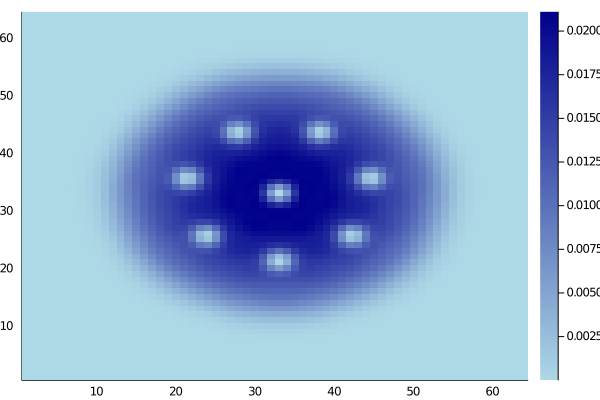

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)